In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob 
import os 
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [2]:
images = glob.glob('')

for i in range(len(images)): 
    try : 
        t = 'image'+str(i)+'.jpg'
        image = cv2.imread(images[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)09
        cv2.imwrite('/content/drive/MyDrive/Exam_dataset/exam_dataset7_train_1804'.format(t),cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    except : 
        print(i)

In [3]:
path = os.path.dirname('/content/drive/MyDrive/Exam_dataset/exam_dataset7_train_1804')
label = os.path.basename(path)

In [4]:
data = []
labels = []

for folder in ['looking_back','normal','passing_gesture']:
    images = glob.glob('/content/drive/MyDrive/Exam_dataset/exam_dataset7_train_1804/%s/*.*'%folder)

    for i in range(len(images)): 
        image = cv2.imread(images[i])
        try : 
            image = cv2.resize(image, (224,224))
            image = tf.keras.preprocessing.image.img_to_array(image)
            data.append(image)
            labels.append(folder)
        except : 
            pass
    print(len(images),folder)


333 looking_back
333 normal
333 passing_gesture


In [5]:
import numpy as np
import pandas as pd
data = np.array(data)
label = np.array(labels)
print(data.shape)

(999, 224, 224, 3)


In [6]:
dict_ = {'normal':0,
       'looking_back':1,
       'passing_gesture':2,
       }
label_dict = {0: 'normal', 1: 'looking_back',2: 'passing_gesture'}
label = np.vectorize(dict_.get)(label)

In [7]:
train_images_reshaped = data.reshape((-1, 224, 224,3))
train_labels_reshaped = to_categorical(label, num_classes=3)

In [8]:
model = Sequential()

# Block 1
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images_reshaped, train_labels_reshaped, epochs=15)

Epoch 1/15
32/32 [==============================] - 41s 489ms/step - loss: 1.0773 - accuracy: 0.4414
Epoch 2/15
32/32 [==============================] - 12s 380ms/step - loss: 0.9904 - accuracy: 0.6416
Epoch 3/15
32/32 [==============================] - 12s 389ms/step - loss: 0.9178 - accuracy: 0.7377
Epoch 4/15
32/32 [==============================] - 13s 396ms/step - loss: 0.8511 - accuracy: 0.7848
Epoch 5/15
32/32 [==============================] - 13s 403ms/step - loss: 0.7793 - accuracy: 0.8038
Epoch 6/15
32/32 [==============================] - 13s 414ms/step - loss: 0.7005 - accuracy: 0.8388
Epoch 7/15
32/32 [==============================] - 13s 411ms/step - loss: 0.6326 - accuracy: 0.8478
Epoch 8/15
32/32 [==============================] - 13s 406ms/step - loss: 0.5666 - accuracy: 0.8689
Epoch 9/15
32/32 [==============================] - 13s 402ms/step - loss: 0.5003 - accuracy: 0.8809
Epoch 10/15
32/32 [==============================] - 13s 401ms/step - loss: 0.4519 - accura

In [12]:
model.save_weights('vgg16_v1.h5')

In [13]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Exam_dataset/exam_dataset7_train_1804',  
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='categorical')

model.fit_generator(
        train_generator,
        steps_per_epoch=20 // batch_size,
        epochs=30)
model.save_weights('vgg16_v1_after_train.h5')  # always save your weights after training or during training

Found 999 images belonging to 3 classes.


<ipython-input-13-bec9ffe91447>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 1.0981 - accuracy: 0.1875
Epoch 2/30
1/1 [==============================] - 1s 586ms/step - loss: 1.0983 - accuracy: 0.3750
Epoch 3/30
1/1 [==============================] - 1s 571ms/step - loss: 1.0979 - accuracy: 0.2500
Epoch 4/30
1/1 [==============================] - 1s 566ms/step - loss: 1.0979 - accuracy: 0.4375
Epoch 5/30
1/1 [==============================] - 1s 563ms/step - loss: 1.0972 - accuracy: 0.3125
Epoch 6/30
1/1 [==============================] - 1s 564ms/step - loss: 1.0969 - accuracy: 0.3750
Epoch 7/30
1/1 [==============================] - 1s 566ms/step - loss: 1.0977 - accuracy: 0.4375
Epoch 8/30
1/1 [==============================] - 1s 565ms/step - loss: 1.0979 - accuracy: 0.3125
Epoch 9/30
1/1 [==============================] - 1s 569ms/step - loss: 1.0975 - accuracy: 0.3750
Epoch 10/30
1/1 [==============================] - 1s 565ms/step - loss: 1.0967 - accuracy: 0.5625
Epoch 11/30
1/1 [=====

In [63]:
batch_size = 1
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Exam_dataset/random',
    color_mode = "rgb",
    target_size=(224, 224),
    batch_size=1, 
    shuffle=True)
y_pred = model.predict_generator(test_generator, 1//batch_size) 

Found 20 images belonging to 1 classes.


<ipython-input-63-0fec7e33612f>:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, 1//batch_size)


1/1 [==============================] - 0s 19ms/step
[[0.33227497 0.33509064 0.3326344 ]]


Text(0.5, 1.0, 'looking_back')

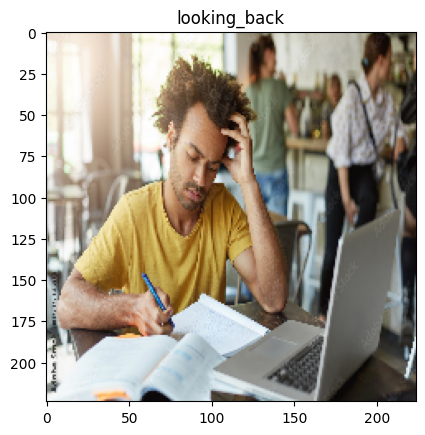

In [64]:
x_test,y_test = next(test_generator)
p = model.predict(x_test)

print(p)
print
p = p.argmax()
plt.imshow(x_test[0])
#plt.title(x_test[])
plt.title(label_dict[p])